# Pthong数据分析第02天

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
array1 = np.random.randint(10, 50 ,10)
array1

array([47, 14, 44, 20, 30, 47, 49, 48, 28, 41])

In [3]:
array1.sum()

368

In [4]:
array1.mean()

36.8

In [5]:
array1.std()

12.155657119218196

In [6]:
array1.var()

147.76000000000002

In [7]:
array1.min()

14

In [8]:
array1.max()

49

In [9]:
np.median(array1)

42.5

In [10]:
channel_a = np.array([42,45,62,56,35,79,67,74,30,28,54])
channel_a

array([42, 45, 62, 56, 35, 79, 67, 74, 30, 28, 54])

In [11]:
channel_b = np.array([65,36,123,25,45,32,26,78,57,51,34])
channel_b

array([ 65,  36, 123,  25,  45,  32,  26,  78,  57,  51,  34])

In [12]:
channel_c = np.array([82,36,21,23,25,43,52,59,60,76,95])
channel_c

array([82, 36, 21, 23, 25, 43, 52, 59, 60, 76, 95])

In [13]:
channel_a.sum(), channel_a.mean(), channel_a.std(), channel_a.var(), np.median(channel_a)

(572, 52.0, 16.66787874380486, 277.8181818181818, 54.0)

In [14]:
pd.Series(channel_a).describe()

count    11.000000
mean     52.000000
std      17.481419
min      28.000000
25%      38.500000
50%      54.000000
75%      64.500000
max      79.000000
dtype: float64

In [15]:
channel_b.sum(), channel_b.mean(), channel_b.std(), channel_b.var(), np.median(channel_b)

(572, 52.0, 27.545004496773508, 758.7272727272727, 45.0)

In [16]:
pd.Series(channel_b).describe()

count     11.000000
mean      52.000000
std       28.889444
min       25.000000
25%       33.000000
50%       45.000000
75%       61.000000
max      123.000000
dtype: float64

In [17]:
channel_c.sum(), channel_c.mean(), channel_c.std(), channel_c.var(), np.median(channel_c)

(572, 52.0, 23.943114402114176, 573.2727272727273, 52.0)

In [18]:
pd.Series(channel_c).describe()

count    11.00000
mean     52.00000
std      25.11175
min      21.00000
25%      30.50000
50%      52.00000
75%      68.00000
max      95.00000
dtype: float64

#### 用数值判定法检测疑似异常值（离群点）

In [19]:
array2 = np.array([5,6,6,6,6,8,10,500])
array2

array([  5,   6,   6,   6,   6,   8,  10, 500])

In [20]:
q1, q3 = np.quantile(array2, [0.25, 0.75])
q1, q3

(6.0, 8.5)

In [21]:
iqr = q3 - q1
iqr

2.5

In [22]:
array2[(array2 < (q1 - 1.5 * iqr)) | (array2 > q3 + 1.5 * iqr)]

array([500])

In [23]:
def outerliers_by_iqr(array, whis=1.5):
    """数值判定法检测离群点"""
    q1, q3 = np.quantile(array, [0.25, 0.75])
    iqr = q3 - q1
    return array[(array < q1 - whis * iqr) | (array > q3 + whis * iqr)]
    

In [24]:
def outerliers_by_zscore(array, threshold=3):
    """Z-Score判定法检测离群点"""
    mu, sigma = array.mean(), array.std()
    return array[np.abs((array - mu) / sigma) > threshold]

In [25]:
array3 = np.arange(1, 11)
array3[-1] = 500
array3

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 500])

In [26]:
outerliers_by_iqr(array3), outerliers_by_zscore(array3)

(array([500]), array([], dtype=int32))

In [27]:
array4 = np.tile(array3[:-1], 10)
array4 = np.append(array4, array3[-1])
array4 = np.insert(array4, 1, 500)
array4

array([  1, 500,   2,   3,   4,   5,   6,   7,   8,   9,   1,   2,   3,
         4,   5,   6,   7,   8,   9,   1,   2,   3,   4,   5,   6,   7,
         8,   9,   1,   2,   3,   4,   5,   6,   7,   8,   9,   1,   2,
         3,   4,   5,   6,   7,   8,   9,   1,   2,   3,   4,   5,   6,
         7,   8,   9,   1,   2,   3,   4,   5,   6,   7,   8,   9,   1,
         2,   3,   4,   5,   6,   7,   8,   9,   1,   2,   3,   4,   5,
         6,   7,   8,   9,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       500])

In [28]:
outerliers_by_iqr(array4), outerliers_by_zscore(array4)

(array([500, 500]), array([500, 500]))

In [29]:
array5 = array3.astype(np.float64)
array5

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9., 500.])

In [30]:
with open('array3', 'wb') as file:
    array3.dump(file)

In [31]:
with open('array3', 'rb') as file:
    array6 = np.load(file, allow_pickle=True)
array6

array([  1,   2,   3,   4,   5,   6,   7,   8,   9, 500])

In [32]:
array6.fill(100)
array6

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100])

In [33]:
array7 = np.random.randint(1, 100, 10).reshape(5, 2)
array7

array([[ 5, 16],
       [12,  4],
       [12, 97],
       [85, 69],
       [74, 29]])

In [34]:
array8 = array7.flatten()
array8

array([ 5, 16, 12,  4, 12, 97, 85, 69, 74, 29])

In [35]:
array8.sort()
array8

array([ 4,  5, 12, 12, 16, 29, 69, 74, 85, 97])

In [36]:
array8 = np.random.randint(1, 100, 10)
array8

array([30, 20, 99, 27, 98, 57, 59, 51, 21, 80])

In [37]:
np.sort(array8)

array([20, 21, 27, 30, 51, 57, 59, 80, 98, 99])

In [38]:
array8

array([30, 20, 99, 27, 98, 57, 59, 51, 21, 80])

In [39]:
array7.transpose()

array([[ 5, 12, 12, 85, 74],
       [16,  4, 97, 69, 29]])

In [40]:
array7.swapaxes(0, 1)

array([[ 5, 12, 12, 85, 74],
       [16,  4, 97, 69, 29]])

In [41]:
scorse = plt.imread('D:\Python数据分析\Data-analysis\成绩柱状图.png')
scorse.shape

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python数据分析\\Data-analysis\\成绩柱状图.png'

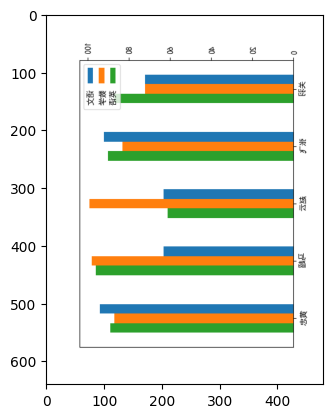

In [ ]:
plt.imshow(scorse.swapaxes(0, 1))

In [ ]:
array7.tolist()

[[47, 91], [63, 94], [18, 32], [14, 28], [54, 55]]

In [ ]:
array8.tolist()

[24, 27, 74, 4, 26, 27, 10, 64, 82, 54]

In [ ]:
array9 = np.array([1, 1, 2, 2, 3, 4, 5,6,7,8,8,8,9,])
array9

array([1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 8, 8, 9])

In [ ]:
np.unique(array9)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
array10 = np.array([[1, 1, 1], [2, 2, 2]])
array10

array([[1, 1, 1],
       [2, 2, 2]])

In [ ]:
array11 = np.array([[3, 3, 3], [4, 4, 4]])
array11

array([[3, 3, 3],
       [4, 4, 4]])

In [ ]:
np.concatenate([array10, array11])

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [ ]:
np.concatenate([array10, array11], axis=1)

array([[1, 1, 1, 3, 3, 3],
       [2, 2, 2, 4, 4, 4]])

In [ ]:
array13 = np.hstack([array10, array11])
array13

array([[1, 1, 1, 3, 3, 3],
       [2, 2, 2, 4, 4, 4]])

In [ ]:
array12 = np.vstack([array10, array11])
array12

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [ ]:
np.stack([array10, array11], axis=0)

array([[[1, 1, 1],
        [2, 2, 2]],

       [[3, 3, 3],
        [4, 4, 4]]])

In [ ]:
np.stack([array10, array11], axis=1)

array([[[1, 1, 1],
        [3, 3, 3]],

       [[2, 2, 2],
        [4, 4, 4]]])

In [ ]:
np.vsplit(array12, 4)

[array([[1, 1, 1]]),
 array([[2, 2, 2]]),
 array([[3, 3, 3]]),
 array([[4, 4, 4]])]

In [ ]:
np.hsplit(array12, 3)

[array([[1],
        [2],
        [3],
        [4]]),
 array([[1],
        [2],
        [3],
        [4]]),
 array([[1],
        [2],
        [3],
        [4]])]

In [ ]:
np.split(array13, 2, axis=1)

[array([[1, 1, 1],
        [2, 2, 2]]),
 array([[3, 3, 3],
        [4, 4, 4]])]

In [ ]:
array14 = np.random.randint(1, 100, 10)
array14

array([94, 76, 44,  3, 21, 39, 77, 78, 97, 33])

In [ ]:
np.extract(array14 > 50, array14)

array([94, 76, 77, 78, 97])

In [ ]:
array14[array14 > 50]

array([94, 76, 77, 78, 97])

In [ ]:
np.select([array14 % 2 == 0, array14 % 2 != 0], [array14 + 100, array14 - 100])

array([194, 176, 144, -97, -79, -61, -23, 178,  -3, -67])

In [ ]:
np.where(array14 % 2 == 0, array14 * 2, array14 / 2)

array([188. , 152. ,  88. ,   1.5,  10.5,  19.5,  38.5, 156. ,  48.5,
        16.5])

In [ ]:
array15 = np.arange(1, 10).reshape(3, 3)
array15

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
np.resize(array15, (2, 5))

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 1]])

In [ ]:
array16 = np.arange(1, 25).reshape(3, 4, 2)
array16

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12],
        [13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20],
        [21, 22],
        [23, 24]]])

In [ ]:
array17 = np.arange(1, 5).reshape(4, 1)
array17

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
array16 + array17

array([[[ 2,  3],
        [ 5,  6],
        [ 8,  9],
        [11, 12]],

       [[10, 11],
        [13, 14],
        [16, 17],
        [19, 20]],

       [[18, 19],
        [21, 22],
        [24, 25],
        [27, 28]]])